In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-v0_8-paper")

font = 16
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'arial',
    'font.size': font,
    'axes.labelsize': font,  
    'xtick.labelsize': font,  
    'ytick.labelsize': font, 
    'legend.fontsize': font,
    'legend.title_fontsize': font,
    'axes.titlesize': font
})
import warnings
warnings.filterwarnings("ignore")

### Exploration vs. Exploitation 

using exploitation degree $d$

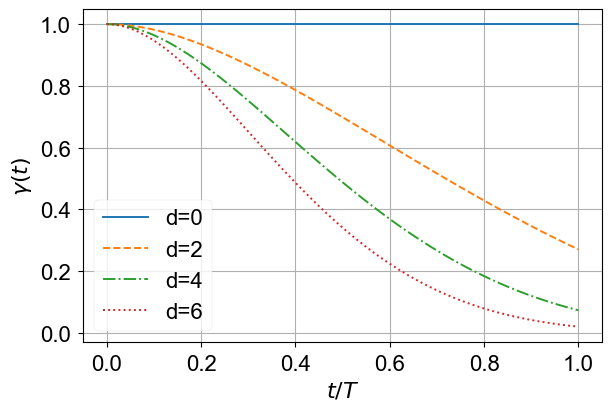

In [17]:
T = 1
gamma = lambda count, d: (1-np.log(1+count/int(T))**2)**d
x = np.linspace(0,T,100)
for i,d in enumerate(range(0,8,2)):
    plt.plot(x, [gamma(count,d) for count in x], label=f'd={d}', color=sns.color_palette()[i], ls=['-', '--', '-.', ':'][i])
plt.legend()
plt.ylabel(r'$\gamma(t)$')
plt.xlabel(r'$t/T$')
plt.grid()
plt.tight_layout()
plt.savefig('transition_function.pdf')

Assume $d=4$ and we just started the surrogate optimization process $t=0$

In [ ]:
d = 2
gamma(0,d)

How does the truncated normal distribution (from which we sample the points for the machine learning models) look like?

In [ ]:
from scipy.stats import truncnorm

xmin = 2
xmax = 7
x = 4
std = gamma(0,d) * (xmax - xmin)/2
sample = truncnorm.rvs((xmin - x) / std, (xmax+1 - x) / std, loc=x, scale=std, size=10000)
sample = sample.astype(int)

In [ ]:
fig = plt.hist(sample, bins=50)
plt.xlim((0,9))
plt.show()

Now assume $d=4$ and the end of the optimization process is reached $t=T$.

In [ ]:
d=2
gamma(1,d)

In [ ]:
std = gamma(1,d) * (xmax - xmin)/2
sample = truncnorm.rvs((xmin - x) / std, (xmax+1 - x) / std, loc=x, scale=std, size=10000)
sample = sample.astype(int)

In [ ]:
fig = plt.hist(sample, bins=50)
plt.xlim((0,9))
plt.show()